In [1]:
from keras.models import load_model,Model

Using TensorFlow backend.


In [2]:
vae=load_model(filepath='lfwgenweights.h5')

c:\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

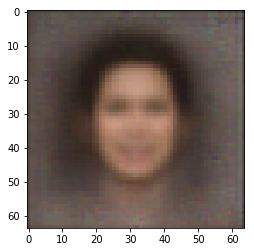

In [16]:
a=np.random.normal(size=(6,1))
x_decoded =vae.predict(a.T)
plt.imshow(x_decoded[0])

In [ ]:
#CREATING A TRACKBAR TO VISUALIZE THE EFFECT OF LATENT VARIABLES

cv2.namedWindow('image')

def nothing(x):
    pass


cv2.createTrackbar('Z1','image',5,400,nothing)
cv2.createTrackbar('Z2','image',5,400,nothing)
cv2.createTrackbar('Z3','image',5,400,nothing)
cv2.createTrackbar('Z4','image',5,400,nothing)
cv2.createTrackbar('Z5','image',5,400,nothing)
cv2.createTrackbar('Z6','image',5,400,nothing)

face=np.random.normal((64,64,3))


while(1):
    op=cv2.resize(face,(256,256),cv2.INTER_LINEAR)
    cv2.imshow('imageo',op)
    if cv2.waitKey(1) & 0xFF==27:
        break
    ai=cv2.getTrackbarPos('Z1','image')    
    bi=cv2.getTrackbarPos('Z2','image')    
    ci=cv2.getTrackbarPos('Z3','image')    
    di=cv2.getTrackbarPos('Z4','image')    
    ei=cv2.getTrackbarPos('Z5','image')    
    fi=cv2.getTrackbarPos('Z6','image')    
    z_sample = np.array([[(ai/200)-1,(bi/200)-1,(ci/200)-1,(di/200)-1,(ei/200)-1,(fi/200)-1]])
    x_decoded=vae.predict(z_sample)
    face=x_decoded[0]
    face=cv2.cvtColor(face,cv2.COLOR_RGB2BGR)
    
cv2.destroyAllWindows() 